In [16]:
import pandas as pd
df = pd.read_csv('dataset/crashes_cleaned.csv')

In [17]:
#pairwise correlation
#get only numerical columns AND BOOL
df_num = df.select_dtypes(include=['float64', 'int64', 'bool'])
correlation = df_num.corr()
#round to 3 decimal places
correlation = correlation.round(1)


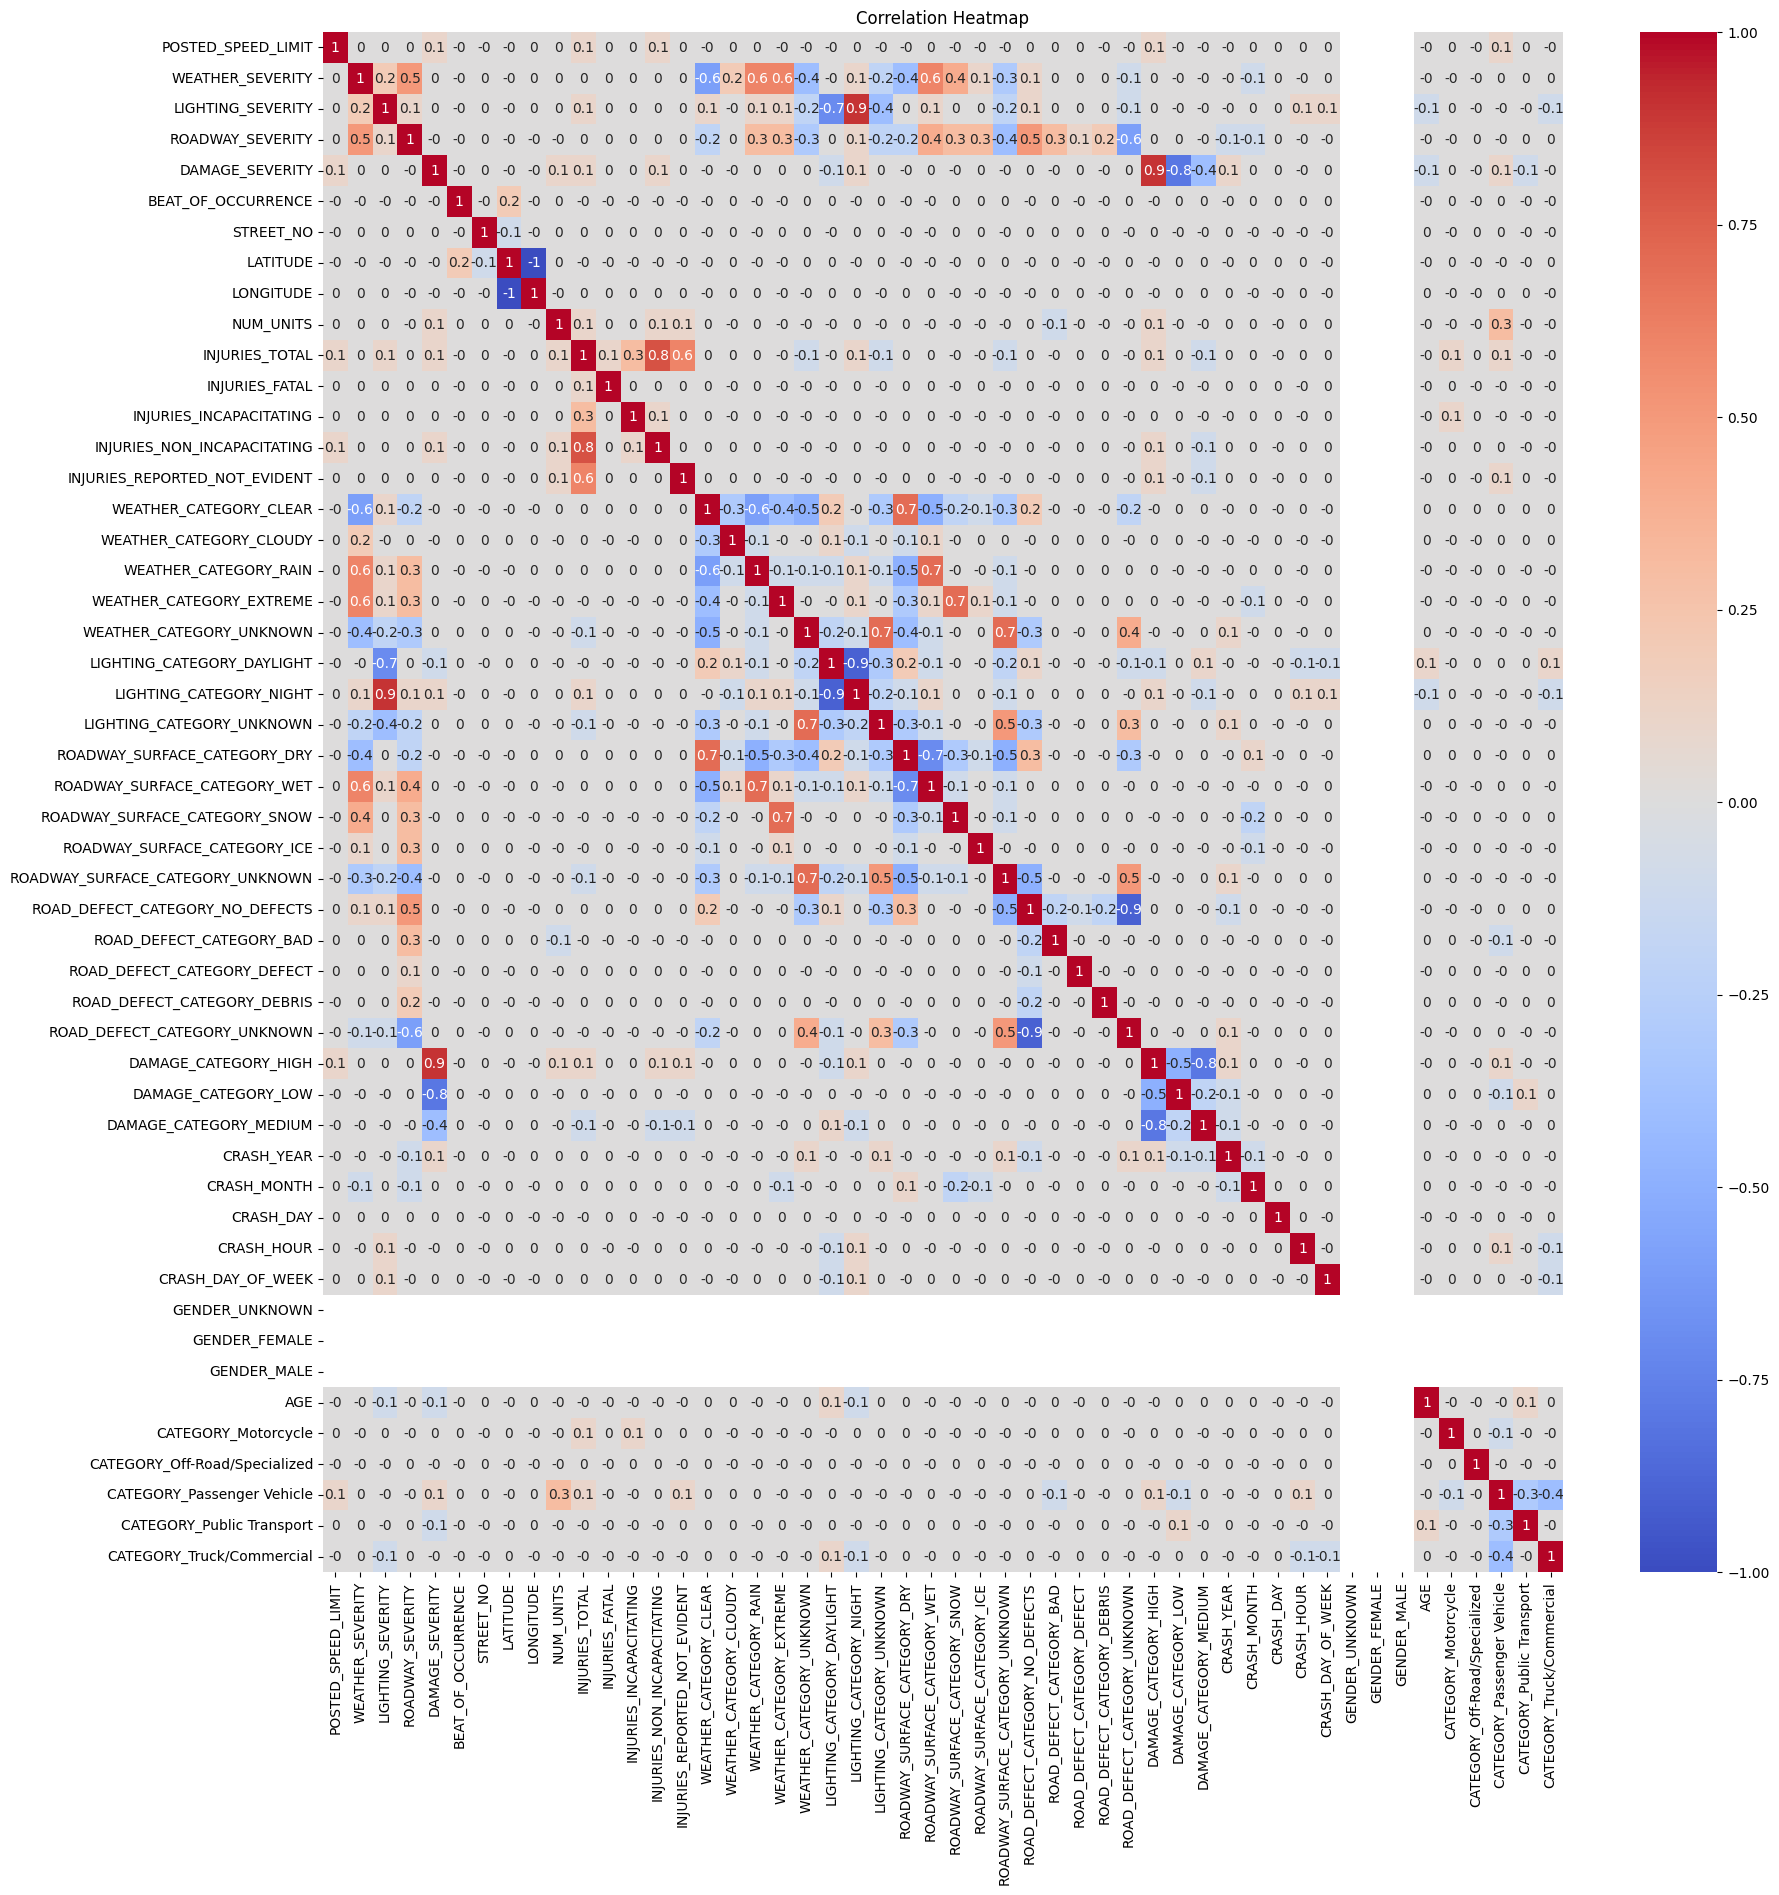

In [18]:
#heatmap of correlation
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [21]:
# get the pairs with 0.5 or higher correlation
correlation2 = correlation[abs(correlation) >= 0.3]

# i want them as (feature, feature) = correlation
correlation2 = correlation2.stack().reset_index()
correlation2 = correlation2[correlation2['level_0'] != correlation2['level_1']]
correlation2['pairs'] = correlation2[['level_0', 'level_1']].apply(lambda x: tuple(sorted(x)), axis=1)
correlation2 = correlation2.drop_duplicates('pairs')
correlation2 = correlation2.set_index('pairs')
correlation2 = correlation2.drop(columns=['level_0', 'level_1'])

print(correlation2)
correlation2.to_csv('dataset/correlation.csv')

                                                      0
pairs                                                  
(ROADWAY_SEVERITY, WEATHER_SEVERITY)                0.5
(WEATHER_CATEGORY_CLEAR, WEATHER_SEVERITY)         -0.6
(WEATHER_CATEGORY_RAIN, WEATHER_SEVERITY)           0.6
(WEATHER_CATEGORY_EXTREME, WEATHER_SEVERITY)        0.6
(WEATHER_CATEGORY_UNKNOWN, WEATHER_SEVERITY)       -0.4
...                                                 ...
(ROAD_DEFECT_CATEGORY_NO_DEFECTS, ROAD_DEFECT_C... -0.9
(DAMAGE_CATEGORY_HIGH, DAMAGE_CATEGORY_LOW)        -0.5
(DAMAGE_CATEGORY_HIGH, DAMAGE_CATEGORY_MEDIUM)     -0.8
(CATEGORY_Passenger Vehicle, CATEGORY_Public Tr... -0.3
(CATEGORY_Passenger Vehicle, CATEGORY_Truck/Com... -0.4

[65 rows x 1 columns]
